In [1]:
import warnings

warnings.filterwarnings( 'ignore' )

In [2]:
import pandas as pd

rating_df = pd.read_csv('C:\\content_caching\\ml-25m\\ratings.csv')
rating_df

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [3]:
import time
import datetime

print('min timestamp: ',rating_df['timestamp'].min(), str(datetime.datetime.fromtimestamp(rating_df['timestamp'].min())))
print('max timestamp: ',rating_df['timestamp'].max(), str(datetime.datetime.fromtimestamp(rating_df['timestamp'].max())))

min timestamp:  789652009 1995-01-09 20:46:49
max timestamp:  1574327703 2019-11-21 18:15:03


In [4]:
standard_year = '2019'
standard_time = standard_year+'-01-01 00:00:00' # 2019년 데이터만 사용
standard_time = datetime.datetime.strptime(standard_time, '%Y-%m-%d %H:%M:%S')
standard_timestamp = int(time.mktime(standard_time.timetuple()))
print('test timestamp: ', standard_timestamp)
print('test time: ',str(datetime.datetime.fromtimestamp(standard_timestamp)))

test timestamp:  1546268400
test time:  2019-01-01 00:00:00


In [5]:
after2019_rating_df = rating_df[rating_df['timestamp'] >= standard_timestamp].reset_index(drop=True)
after2019_rating_df

,userId,movieId,rating,timestamp
0,3,1274,4.5,1566088819
1,3,1732,4.5,1566091883
2,3,1960,4.0,1566090766
3,3,2021,4.0,1566089449
4,3,3408,3.5,1566089773
...,...,...,...,...
1202597,162536,148626,5.0,1572259347
1202598,162536,148685,5.0,1572257813
1202599,162536,164179,4.0,1572259078
1202600,162536,202429,4.0,1572257782


In [6]:
print('number of  movieIds : ', after2019_rating_df['movieId'].nunique())
print('number of  userId : ', after2019_rating_df['userId'].nunique())

number of  movieIds :  41440
number of  userId :  10619


In [7]:
standards = {'January':['2019-01-01 00:00:00', '2019-02-01 00:00:00'],
             'February':['2019-02-01 00:00:00', '2019-03-01 00:00:00'],
             'March':['2019-03-01 00:00:00', '2019-04-01 00:00:00'],
             'April':['2019-04-01 00:00:00', '2019-05-01 00:00:00'],
             'May':['2019-05-01 00:00:00', '2019-06-01 00:00:00'],
             'June':['2019-06-01 00:00:00', '2019-07-01 00:00:00'],
             'July':['2019-07-01 00:00:00', '2019-08-01 00:00:00'],
             'August':['2019-08-01 00:00:00', '2019-09-01 00:00:00'],
             'September':['2019-09-01 00:00:00', '2019-10-01 00:00:00'],
             'October':['2019-10-01 00:00:00', '2019-11-01 00:00:00'],
             'November':['2019-11-01 00:00:00', '2019-12-01 00:00:00'],
             'December':['2019-12-01 00:00:00', '2020-01-01 00:00:00']
             }

Month = list(standards.keys())[1-1] # 4월 -1 index
print(Month)
start_time = datetime.datetime.strptime(standards[Month][0], '%Y-%m-%d %H:%M:%S')
end_time = datetime.datetime.strptime(standards[Month][1], '%Y-%m-%d %H:%M:%S')

start_timestamp = int(time.mktime(start_time.timetuple()))
end_timestamp = int(time.mktime(end_time.timetuple()))

print(start_time, start_timestamp)
print(end_time, end_timestamp)

month_rating_df = after2019_rating_df[(after2019_rating_df['timestamp'] < end_timestamp) &
                                   (after2019_rating_df['timestamp'] >= start_timestamp)].reset_index(drop=True)

# 10월까지 1,216 개 생성. 
# 11월까지 1,300 개 생성. 
if Month == 'November': # 12월 데이터는 존재하지 않음. 11월 존재하는 데이터까지만 진행.
    end_timestamp = month_rating_df['timestamp'].max()

month_rating_df

January
2019-01-01 00:00:00 1546268400
2019-02-01 00:00:00 1548946800


,userId,movieId,rating,timestamp
0,104,10,4.0,1547913394
1,104,150,5.0,1547912847
2,104,260,5.0,1547912257
3,104,296,5.0,1547913473
4,104,356,5.0,1547912739
...,...,...,...,...
147759,162534,188207,3.0,1548083452
147760,162534,193065,3.0,1548083784
147761,162534,193944,3.0,1548083347
147762,162534,194400,3.0,1548083397


In [8]:
# 해당 월에 데이터가 없다면 종료.
import sys

if len(month_rating_df) == 0:
    sys.exit('해당 월에 데이터 없음')

In [9]:
print('number of  movieIds : ', month_rating_df['movieId'].nunique())
print('number of  userId : ', month_rating_df['userId'].nunique())

number of  movieIds :  13521
number of  userId :  3110


In [10]:
month_rating_df['movieId'].value_counts()

79132     466
318       448
2571      447
122912    437
7153      415
         ... 
180441      1
197673      1
188569      1
167842      1
195331      1
Name: movieId, Length: 13521, dtype: int64

In [11]:
import pandas as pd

# Assuming your DataFrame is named month_rating_df

# Count the frequency of each movieId
movie_frequency = month_rating_df['movieId'].value_counts()

# Create a dictionary to map original movieIds to their corresponding frequencies
movie_frequency_map = movie_frequency.to_dict()

# Sort the dictionary by frequency and assign new movieId values starting from 0
sorted_movie_ids = sorted(movie_frequency_map, key=lambda x: movie_frequency_map[x], reverse=True)
remapped_ids = {movie_id: idx for idx, movie_id in enumerate(sorted_movie_ids)}

# Apply the remapping to the DataFrame
month_rating_df['remapped_movieId'] = month_rating_df['movieId'].map(remapped_ids)

# Now month_rating_df contains a new column 'remapped_movieId' with the remapped values
month_rating_df

,userId,movieId,rating,timestamp,remapped_movieId
0,104,10,4.0,1547913394,787
1,104,150,5.0,1547912847,363
2,104,260,5.0,1547912257,13
3,104,296,5.0,1547913473,12
4,104,356,5.0,1547912739,10
...,...,...,...,...,...
147759,162534,188207,3.0,1548083452,1275
147760,162534,193065,3.0,1548083784,140
147761,162534,193944,3.0,1548083347,279
147762,162534,194400,3.0,1548083397,769


In [12]:
month_rating_df['remapped_movieId'].value_counts()

0        466
1        448
2        447
3        437
4        415
        ... 
13516      1
13517      1
13518      1
13519      1
13520      1
Name: remapped_movieId, Length: 13521, dtype: int64

In [13]:
movie_id_probabilites = month_rating_df['remapped_movieId'].value_counts() / month_rating_df['remapped_movieId'].value_counts().sum()
movie_id_probabilites

0        0.003154
1        0.003032
2        0.003025
3        0.002957
4        0.002809
           ...   
13516    0.000007
13517    0.000007
13518    0.000007
13519    0.000007
13520    0.000007
Name: remapped_movieId, Length: 13521, dtype: float64

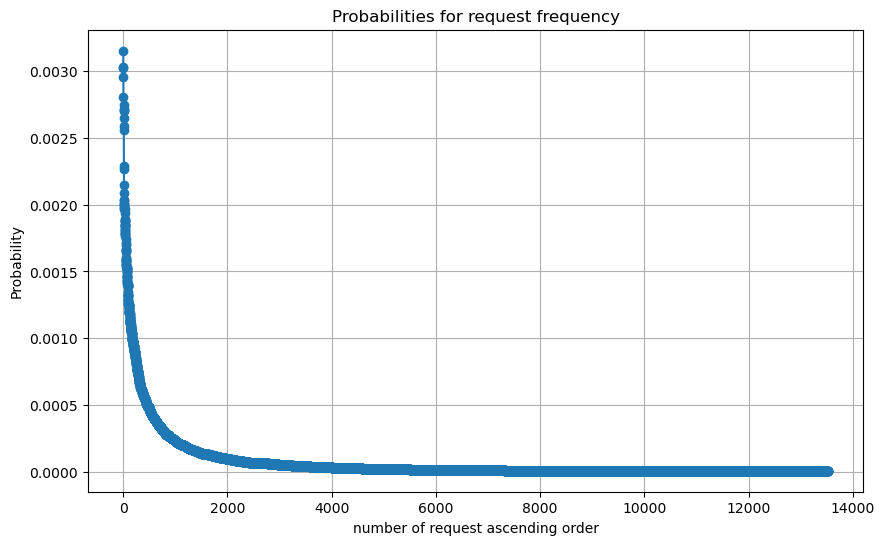

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualize the probabilities for the first row
plt.figure(figsize=(10, 6))
plt.plot(range(len(movie_id_probabilites.values)), movie_id_probabilites.values, marker='o')
plt.xlabel('number of request ascending order')
plt.ylabel('Probability')
plt.title('Probabilities for request frequency')
plt.grid(True)
plt.show()

In [15]:
movie_id_probabilites.sum()

1.0

In [16]:
pareto = int(month_rating_df['movieId'].nunique() * 0.2)
print('top 20% 개수 : ', pareto)

pareto_probability = sum(movie_id_probabilites.values[:pareto+1])
print('top 20% 비율 : ', pareto_probability)

top 20% 개수 :  2704
top 20% 비율 :  0.8432635824693474


In [17]:
number_of_service_Ids = 64

Y = 0.2

pareto_number_of_service_ids = int(number_of_service_Ids * Y)

pareto_number_of_movies_per_service = int(pareto / pareto_number_of_service_ids) + 1
print('pareto : ',pareto_number_of_service_ids, pareto_number_of_movies_per_service)

not_pareto_number_of_service_ids = number_of_service_Ids - pareto_number_of_service_ids
try:
    not_pareto_number_of_movies_per_service = int((month_rating_df['movieId'].nunique()-pareto) / not_pareto_number_of_service_ids) + 1
except:
    not_pareto_number_of_movies_per_service = 0
print('rest pareto : ', not_pareto_number_of_service_ids, not_pareto_number_of_movies_per_service)

pareto :  12 226
rest pareto :  52 209


In [18]:
# Create a mapping dictionary for remapped_movieId to service_id
mapping_dict = {}

pareto = pareto_number_of_service_ids * pareto_number_of_movies_per_service

# Map the remapped_movieId values to service_id values
current_service_id = 0
for value in range(pareto):
    if value % pareto_number_of_movies_per_service == 0 and value != 0:
        current_service_id += 1
    mapping_dict[value] = current_service_id

for value in range(pareto, month_rating_df['movieId'].nunique()):
    tmp_value = value-pareto
    try:
        if tmp_value % not_pareto_number_of_movies_per_service == 0:
            current_service_id += 1
        mapping_dict[value] = current_service_id
    except:
        break

# 실험단계
1. 16개의 MECS로 구성된 시스템에 U개의 user를 random하게 포설 (user의 번호를 포설된 순으로 1부터 U까지 매김)  
2. 무비랜즈 파일을 열어 첫번째 timestamp t1가 있는 정보 (i.e., 무비1)를 user 1에 할당 (즉, user 1이 t1에서 무비1선택)
3. 선택한무비가위에서나눈128개의서비스ID중어디에속하는지판단하여해당서비스ID의요청횟수1증가시킴
4. 이와같은방법으로timeslott동안서비스ID별요청횟수를얻음

In [19]:
import random

# Set the seed value
random.seed(42)

# Example usage
number_of_sample_users = 1000
number_of_mecs = 9  # Number of sqrt MECs
mecs = [(x, y) for x in range(int(number_of_mecs**(1/2))) for y in range(int(number_of_mecs**(1/2)))]

print(mecs)

mean_velocity = 1.0
correlation_time = 0.5

# Number of move
num_steps = 1

now_positions = [(round(random.uniform(0, int(number_of_mecs**(1/2))-1), 13), round(random.uniform(0, int(number_of_mecs**(1/2))-1), 13)) for _ in range(number_of_sample_users)]
print('min,  max : ', 0, int(number_of_mecs**(1/2))-1)
print('now_positions[1] : ', now_positions[10])

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
min,  max :  0 2
now_positions[1] :  (1.6116385036656, 1.3962787899765)


In [20]:
shffled_group_id_per_mec = []

import random

random.seed(42)

# Step 1: Create empty groups
groups = [[] for _ in range(64)]

# Step 2: Populate groups based on values
for key, value in mapping_dict.items():
    groups[value].append((key))

service_id_per_mec = []
for mec in range(number_of_mecs):
    random.shuffle(groups)
    shuffled_ids = []

    tmp_mapping_dict = {}
    for service_id, keys in enumerate(groups):
        shuffled_ids.append(mapping_dict[keys[0]]) # save original service id

        for key in keys:
            tmp_mapping_dict[key] = service_id # service id remapping

    shffled_group_id_per_mec.append(shuffled_ids)
    service_id_per_mec.append(tmp_mapping_dict)

len(service_id_per_mec)

9

In [21]:
for idx in range(len(service_id_per_mec)):
    count = 0

    for value in service_id_per_mec[idx].values():
        if value == 0:
            count+=1

    print(idx, count)

0 209
1 226
2 209
3 226
4 209
5 226
6 209
7 226
8 209


In [22]:
import pandas as pd

# Create a dictionary to map old column names to new ones
column_mapping = {f'rank {i+1}': f'service{i}' for i in range(64)}

# Now your dataframe will have columns named 'service0', 'service1', ..., 'service63'
rank_of_each_service = pd.DataFrame(shffled_group_id_per_mec, columns=column_mapping)
rank_of_each_service

,rank 1,rank 2,rank 3,rank 4,rank 5,rank 6,rank 7,rank 8,rank 9,rank 10,...,rank 55,rank 56,rank 57,rank 58,rank 59,rank 60,rank 61,rank 62,rank 63,rank 64
0,23,25,7,22,45,33,19,59,46,9,...,43,6,61,8,63,15,17,47,1,14
1,9,59,23,5,33,2,44,50,0,36,...,40,48,56,35,14,41,3,19,6,57
2,23,57,18,19,0,27,29,30,1,10,...,7,33,63,12,8,38,34,21,36,26
3,9,10,63,38,27,21,29,4,50,56,...,31,41,49,8,26,13,32,28,36,1
4,44,12,16,22,2,56,42,5,59,39,...,60,51,38,14,1,43,35,33,48,41
5,3,7,10,18,43,58,62,31,49,61,...,33,11,34,60,15,63,13,48,22,28
6,53,22,47,16,12,0,42,26,2,35,...,46,13,31,50,49,34,62,55,63,29
7,3,4,25,16,58,0,43,52,15,8,...,35,21,48,45,13,31,32,28,9,59
8,24,31,13,35,4,29,60,15,47,34,...,63,3,6,55,25,1,33,56,45,50


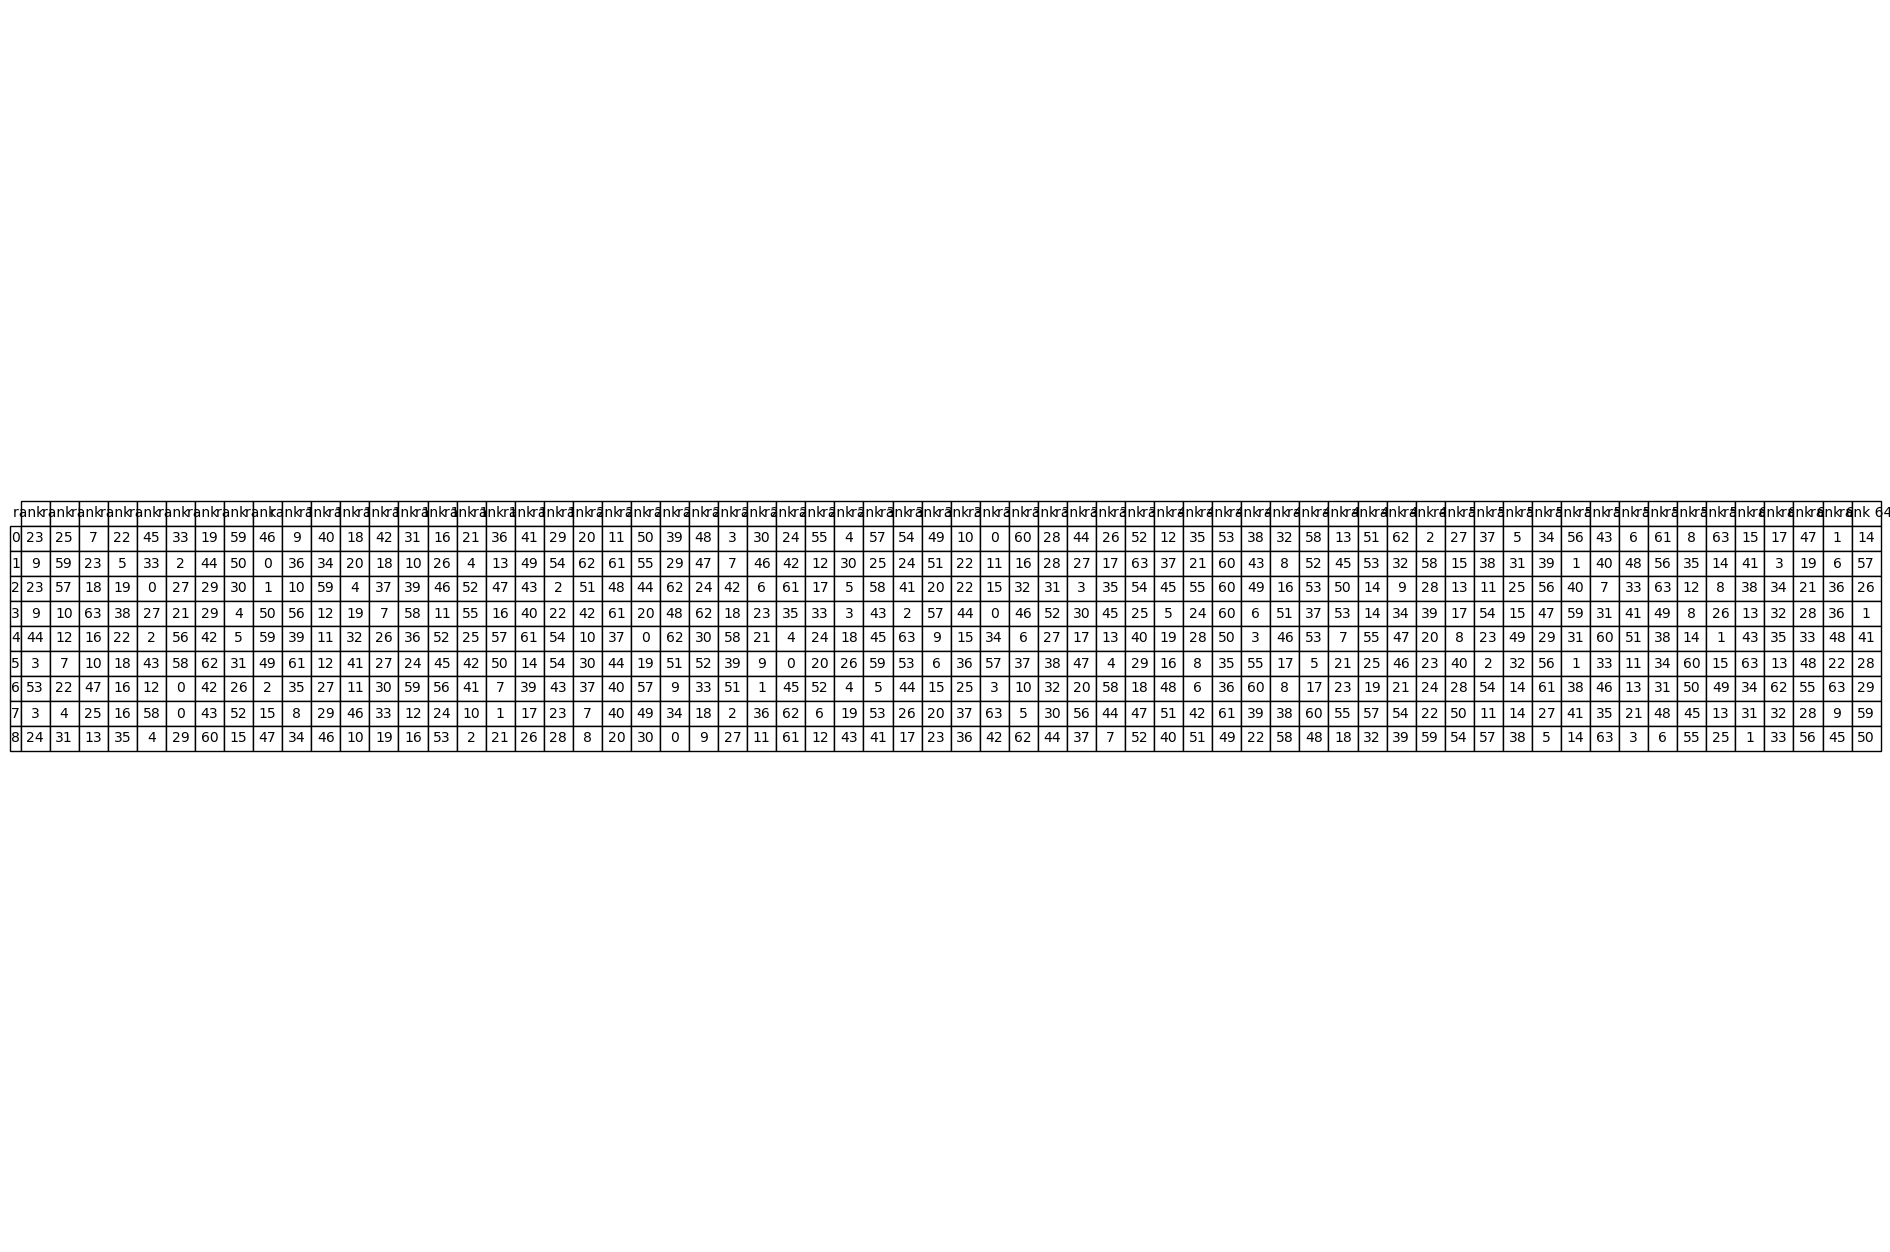

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with your data

# Save the DataFrame as a CSV file
rank_of_each_service.to_csv('./Figs/rank_of_each_service.csv', index=False)  # Set index=False to exclude the index column

# Load the CSV file using pandas (optional, but useful if you want to check the data)
df_from_csv = pd.read_csv('./Figs/rank_of_each_service.csv')

# Convert the DataFrame to a numpy array
data_matrix = df_from_csv.to_numpy()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 16))  # Adjust the figure size as needed

# Display the data as a table
table = ax.table(cellText=data_matrix, loc='center', cellLoc='center', rowLabels=rank_of_each_service.index, colLabels=rank_of_each_service.columns)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)  # Adjust the scaling as needed

# Remove axis labels
ax.axis('off')

# Show the plot (optional)
plt.show()


In [ ]:
data = {
    'userId' : range(number_of_sample_users),
    'x_position' : [now_position[0] for now_position in now_positions],
    'y_position' : [now_position[1] for now_position in now_positions]
}

user_df = pd.DataFrame(data)
user_df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'specific_column' and 'other_column' with the actual column names you want to visualize
plt.scatter(user_df['x_position'],user_df['y_position'])
plt.xlabel('x_position')
plt.ylabel('y_position')
plt.title('Scatter Plot')
plt.show()

In [ ]:
import numpy as np

mecs_array = np.array(mecs)

def calculate_nearest_mec(group):
    distances = np.sqrt((group['x_position'].values[:, np.newaxis] - mecs_array[:, 0])**2 + (group['y_position'].values[:, np.newaxis] - mecs_array[:, 1])**2)
    nearest_mec_index = np.argmin(distances)
    group['nearest_mec'] = nearest_mec_index
    return group

user_df = user_df.groupby('userId').apply(calculate_nearest_mec)
user_df

In [ ]:
# time_t1, time_interval 모두 timestamp 형태

import pandas as pd
import numpy as np

def make_request_list(dataframe, now, time_interval):
    now_datetime = pd.to_datetime(now, unit='s')
    end_datetime = now_datetime + pd.Timedelta(hours=time_interval)
    request_df = dataframe[(pd.to_datetime(dataframe['timestamp'], unit='s') >= now_datetime) & (pd.to_datetime(dataframe['timestamp'], unit='s') <= end_datetime)]
    end_time = int(end_datetime.timestamp())
    return request_df, end_time

now = start_timestamp  # 현재 시간(timestamp)
time_interval = 6  # 시간 간격(hours 단위)
ex_rating_df = month_rating_df.copy()

In [ ]:
tmp = ex_rating_df[ex_rating_df['timestamp']>=1552964400]
tmp

In [ ]:
tmp = tmp[tmp['timestamp']<=1552964400+(3600*6)]
tmp

In [ ]:
# Function to map request_movie_ids based on nearest_mec
def map_movie_ids_to_service_ids(row):
    nearest_mec = row['nearest_mec']
    request_movie_ids = row['request_movie_ids']

    if 0 <= nearest_mec < len(service_id_per_mec):
        service_dict = service_id_per_mec[nearest_mec]

        request_service_ids = []
        for request_movie_id in request_movie_ids:
            try: # Y=1 인 경우 하위 80프로 movieId는 할당되는 service가 없음 -> except문 처리 
                request_service_id = service_dict[request_movie_id]
                request_service_ids.append(request_service_id)
            except:
                continue

    return request_service_ids

In [ ]:
import os

save_path = "./heatmap"+'_case2_'+str(Y)

try:
    os.mkdir(save_path)
except:
    print('[Errno 17] File exists')

In [ ]:
import os

num=0

for filename in os.listdir(save_path):
    if filename.lower().endswith('.png'):
        num+=1
num

In [ ]:
import pandas as pd
from PIL import Image

import pandas as pd
# pd.set_option('display.max_rows', None) ## 모든 행을 출력한다.
# pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.


end_time = now

# Determine the maximum values for creating the matrix
max_nearest_mec = number_of_mecs
max_request_service_id = number_of_service_Ids

while end_time < end_timestamp:
    print('save image index:',num)

    request_df, end_time = make_request_list(ex_rating_df, end_time, time_interval)

    # Create a dictionary to map user IDs to their corresponding service_ids
    request_df['userId'] = [i%number_of_sample_users for i in range(len(request_df))]
    user_movie_mapping = request_df.groupby('userId')['remapped_movieId'].apply(list).to_dict()

    # Update the 'request_service_ids' column in user_df
    user_df['request_movie_ids'] = user_df['userId'].map(user_movie_mapping)
    user_df['request_movie_ids'] = user_df['request_movie_ids'].fillna("").apply(list)

    # Apply the mapping function to the DataFrame
    user_df['request_service_ids'] = user_df.apply(map_movie_ids_to_service_ids, axis=1)


    # Initialize the matrix with zeros
    matrix = np.zeros((max_nearest_mec, max_request_service_id), dtype=int)

    # Populate the matrix based on the DataFrame
    for _, row in user_df.iterrows():
        nearest_mec = row['nearest_mec']
        request_service_ids = row['request_service_ids']

        for service_id in request_service_ids:
            matrix[nearest_mec][service_id] += 1

    normalized_matrix = matrix / matrix.max(axis=1, keepdims=True)

    # Create a PIL image from the array
    image = Image.fromarray((255 * normalized_matrix).astype(np.uint8), mode='L')

    file_name = '/train'+str(num)+'.png'
    image.save(save_path+file_name)
    #print(save_path+file_name)

    num+=1

# 생성 확인

In [ ]:
from IPython.display import display
from PIL import Image

# Set up the path to the saved image
save_path = "./heatmap"+'_case2_'+str(Y)
file_name = '/train'+str(num-1)+'.png'


# Load the image
image = Image.open(save_path+file_name)

# Display the image
display(image)

In [ ]:
image_array = np.array(image)
image_array.shape